In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [12]:
train = pd.read_excel('train.xlsx')
train1=pd.read_excel('train1.xlsx')
test=pd.read_excel('test.xlsx')
test1=pd.read_excel('test1.xlsx')

In [13]:
reg1 = GradientBoostingRegressor(n_estimators= 1000,
          max_depth= 12,
          min_samples_split= 50,
          learning_rate= 0.1,
          loss= 'ls')
reg2 = RandomForestRegressor(n_estimators=1000)
reg3 = LinearRegression()

reg1.fit(train,train1)
reg2.fit(train, train1)
reg3.fit(train, train1)

ereg = VotingRegressor([('gb', reg1),('rf',reg2),('lr',reg3)])
ereg.fit(train, train1)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(max_depth=12,
                                                       min_samples_split=50,
                                                       n_estimators=1000)),
                            ('rf', RandomForestRegressor(n_estimators=1000)),
                            ('lr', LinearRegression())])

In [14]:
predict_train = ereg.predict(train)
mse_on_train = np.sqrt(mean_squared_error(train1 , predict_train))
print('rmse_on_train: ',mse_on_train)
predictions = ereg.predict(test)
print("Root Mean Squared Error: " + str(np.sqrt(mean_squared_error(predictions, test1))))

rmse_on_train:  1.0026934244428514
Root Mean Squared Error: 2.2655196640936146


[]

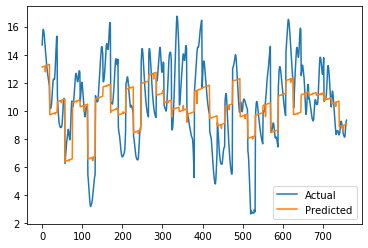

In [15]:
import matplotlib.pyplot as plt
plt.plot(test1,label='Actual')
plt.plot(predictions,label='Predicted')
plt.legend()
plt.plot()